In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

Load the clean data

In [2]:
df = pd.read_csv('../Data/Clean_data.csv')

In [3]:
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Distance_category
0,7930.0,Windy,Low,Afternoon,Scooter,12,1.0,43,Close
1,16420.0,Clear,Medium,Evening,Bike,20,2.0,84,So far
2,9520.0,Foggy,Low,Night,Scooter,28,1.0,59,Close
3,7440.0,Rainy,Medium,Afternoon,Scooter,5,1.0,37,Close
4,19030.0,Clear,Low,Morning,Bike,16,5.0,68,So far


# 1. split my data into X and y 

In [4]:
X = df.drop(columns = ['Delivery_Time_min'], axis = 1)
y = df['Delivery_Time_min']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 2. Scaling and Encoding

2.1 Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_col = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

X_train_en = scaler.fit_transform(X_train.select_dtypes(['int', 'float']))
X_train_encode = pd.DataFrame(X_train_en, columns = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs'])

X_test_en = scaler.fit_transform(X_test.select_dtypes(['int', 'float']))
X_test_encode = pd.DataFrame(X_test_en, columns = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs'])

In [7]:
X_train_encode

,Distance_km,Preparation_Time_min,Courier_Experience_yrs
0,1.389200,-0.980721,0.825402
1,-1.391140,0.126852,-0.553792
2,-1.200658,-0.011595,1.514999
3,-0.452710,1.372871,0.480604
4,-0.957750,-1.257614,-0.553792
...,...,...,...
795,1.308813,0.957531,0.480604
796,-0.124172,-0.426935,-0.898590
797,1.097361,-1.534508,-0.898590
798,1.158525,-1.119168,0.825402


2.2 Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
obj_col = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type', 'Distance_category']

X_train_df = pd.DataFrame()
for col in obj_col:
    X_train_df[col] = le.fit_transform(X_train[col])

X_test_df = pd.DataFrame()
for col in obj_col:
    X_test_df[col] = le.fit_transform(X_test[col])

2.3 Concat the encoder and scaler

In [9]:
X_train_encode = X_train_encode.reset_index(drop= True)
X_train_df = X_train_df.reset_index(drop= True)
X_test_encode = X_test_encode.reset_index(drop= True)
X_test_df = X_test_df.reset_index(drop= True)

In [10]:
X_train_processed = pd.concat([X_train_encode, X_train_df], axis=1)
X_test_processed = pd.concat([X_test_encode, X_test_df], axis=1)

<Axes: >

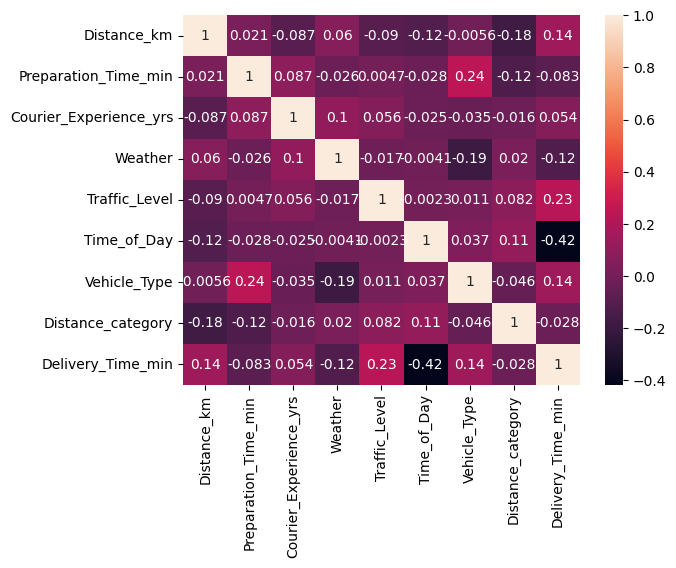

In [11]:
final_df = pd.concat([X_test_processed, y_test], axis = 1)
sns.heatmap(final_df.corr() , annot=True)

# 3. model traning

3.1 import all required library

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report
from sklearn.model_selection import cross_val_score

3.2 Create model dict

In [13]:
models = {
    "LinearRegression" : LinearRegression(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "GradientBoostingRegressor" : GradientBoostingRegressor(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "SVR" : SVR(),
    "KNeighborsRegressor" : KNeighborsRegressor(),
    "XGBRegressor" : XGBRegressor()
}

3.3 model traning

In [14]:
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    
    y_pred_train = model.predict(X_train_processed)
    y_pred = model.predict(X_test_processed)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_gap = r2_train - r2_test

    n = X_test.shape[0]
    p = X_test.shape[1]

    adj_r2 = 1 - ((1 - r2_test) * (n - p)) / (n - p - 1)
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)

    print(name)
    print('r2_train score: ', r2_train)
    print('r2_test score: ', r2_test)
    print('ADJ_r2 is: ', adj_r2)
    print('r2_gap is: ', r2_gap)
    print('MAE is: ', MAE)
    print('MSE is: ', MSE, "\n\n")

LinearRegression
r2_train score:  0.7225069836914442
r2_test score:  0.7487734873199461
ADJ_r2 is:  0.7474581652640295
r2_gap is:  -0.026266503628501914
MAE is:  7.4420033048839835
MSE is:  112.60649981837969 


RandomForestRegressor
r2_train score:  0.955946542273699
r2_test score:  0.778113794913838
ADJ_r2 is:  0.7769520870338058
r2_gap is:  0.177832747359861
MAE is:  7.18145
MSE is:  99.45538250000001 


GradientBoostingRegressor
r2_train score:  0.8475097922968203
r2_test score:  0.8083547007365482
ADJ_r2 is:  0.8073513222063731
r2_gap is:  0.03915509156027208
MAE is:  6.640864308518972
MSE is:  85.90059276182672 


DecisionTreeRegressor
r2_train score:  1.0
r2_test score:  0.4996954389012397
ADJ_r2 is:  0.4970760432933927
r2_gap is:  0.5003045610987603
MAE is:  10.67
MSE is:  224.25 


SVR
r2_train score:  0.6574601141537684
r2_test score:  0.6967218016432315
ADJ_r2 is:  0.6951339576727772
r2_gap is:  -0.039261687489463126
MAE is:  8.271171517708096
MSE is:  135.9374694329043 


K

3.4 Create a best model learning curve

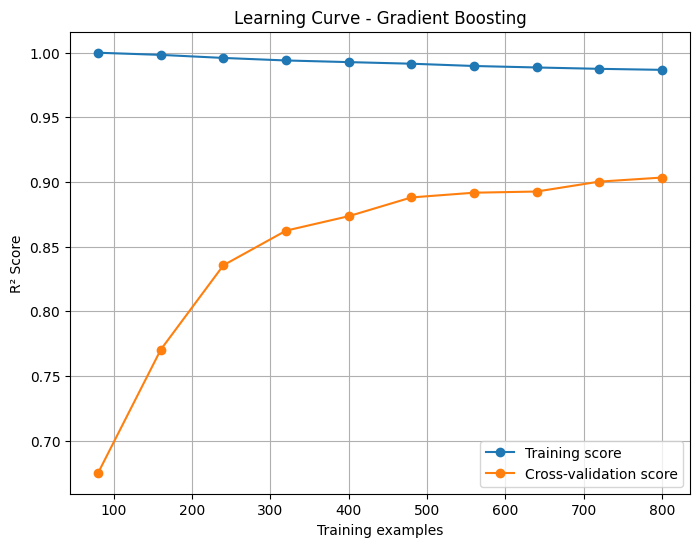

In [15]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_regression
X_train_processed, y_train = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

model = GradientBoostingRegressor()

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_processed, y_train , cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("R² Score")
plt.title("Learning Curve - Gradient Boosting")
plt.legend()
plt.grid(True)
plt.show()

# 4. Create pipeline for model saving

In [16]:
df.select_dtypes('object').columns

Index(['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type',
       'Distance_category'],
      dtype='object')

In [18]:
import pandas as pd 
import numpy as np 
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as ImbPipeline

df = pd.read_csv('../Data/Clean_data.csv')
Target_col = 'Delivery_Time_min'
num_col = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
obj_col = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type', 'Distance_category']

X = df[num_col + obj_col]
y = df[Target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
peprocessor = ColumnTransformer(transformers = [
    ('num', StandardScaler(), num_col),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value= -1), obj_col)
])

pipeline = ImbPipeline(steps = [
   ( 'preprocessing', peprocessor),
   ('model', GradientBoostingRegressor())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2 score is", r2)

joblib.dump(pipeline, 'model.pkl')

r2 score is 0.810943104791057


['model.pkl']